# Introduction

This notebook will include experimental results on the REINFORCE with baseline agent specified in the RL book by Rich Sutton on the smart vacuum environment but with added memory.

In [4]:
# import needed libs

%load_ext autoreload

# Auto reloading causes the kernel to reload the libraries we have
%autoreload 2

# usual imports for visualization, etc.
import numpy as np
import matplotlib.pyplot as plt

import datetime

# make it reproducible
np.random.seed(0)

# show plots inline
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# Some initializations

from envs import SmartVac
from agents import ReinforceWithBaselineMemoryAgent

max_episode_steps = 1000
results_folder = 'res/'
figs_folder = 'figs/'

In [11]:
AgentClass = ReinforceWithBaselineMemoryAgent

best_performance = 0.74
env = SmartVac()
num_of_tests = 1
episode_count = 10000
plot_count = int(episode_count / 100)

alpha_theta = 0.1
alpha_w = 0.01
params_str = f'alpha_theta_{alpha_theta}_alpha_w_{alpha_w}_episodes_{episode_count}'

agent_name = AgentClass.__name__

mult_avgs = []
mult_probs1 = []
mult_probs2 = []
for i_test in range(num_of_tests):
    print()
    print(i_test + 1, end=' ')
    
    # Initialize the agent
    agent = AgentClass(alpha_w=alpha_w, alpha_theta=alpha_theta)
    
    avgs = []
    probs1 = []
    probs2 = []
        
    episode_rewards = np.zeros(episode_count)
    for i_episode in range(episode_count):
        done = False
        totalReward = 0

        if i_episode >= plot_count and (i_episode % plot_count == 0):
            avg = np.average(episode_rewards[i_episode - plot_count:i_episode])
            avgs.append(avg)

            # deterministic position
            env.x = 0
            env.y = 1
            obs = env.get_obs()
            prob = agent.get_action_vals_for_obs(obs)
            probs1.append(prob)

            # stochastic position
            env.x = 1
            env.y = 1
            obs = env.get_obs()
            prob = agent.get_action_vals_for_obs(obs)
            probs2.append(prob)

            print('#', end='', flush=True)
            if len(avgs) % 100 == 0:
                print(i_episode)

        obs = env.reset()
        action = agent.start(obs)

        step = 0
        while not done:
            obs, reward, done = env.step(action)
            action = agent.step(obs, reward, done)
            totalReward += reward

            step += 1
            if step > max_episode_steps:
                done = True

        episode_rewards[i_episode] = totalReward
        agent.update_for_episode()
        
    mult_avgs.append(avgs)
    mult_probs1.append(probs1)
    mult_probs2.append(probs2)
    
avgs = np.mean(np.array(mult_avgs), axis=0)
probs1 = np.mean(np.array(mult_probs1), axis=0)
probs2 = np.mean(np.array(mult_probs2), axis=0)


1 ###################################################################################################

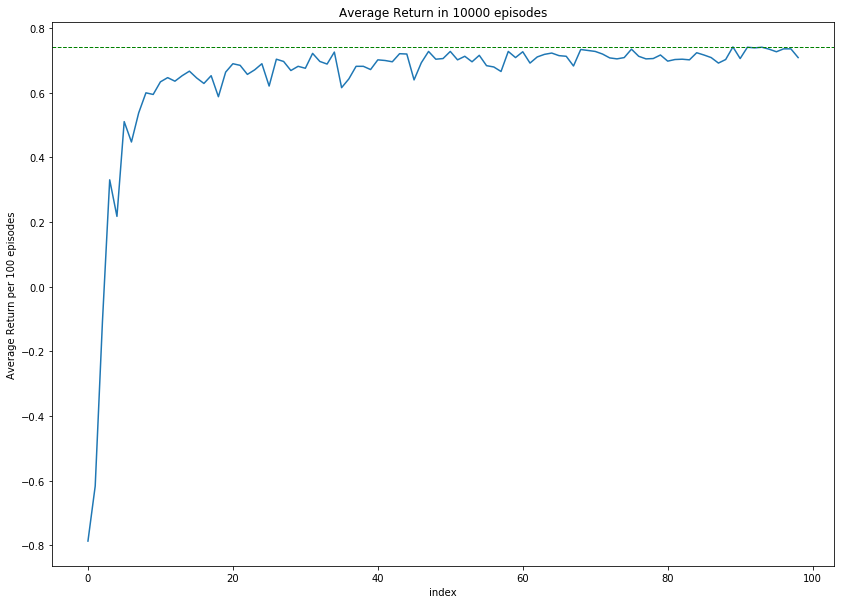

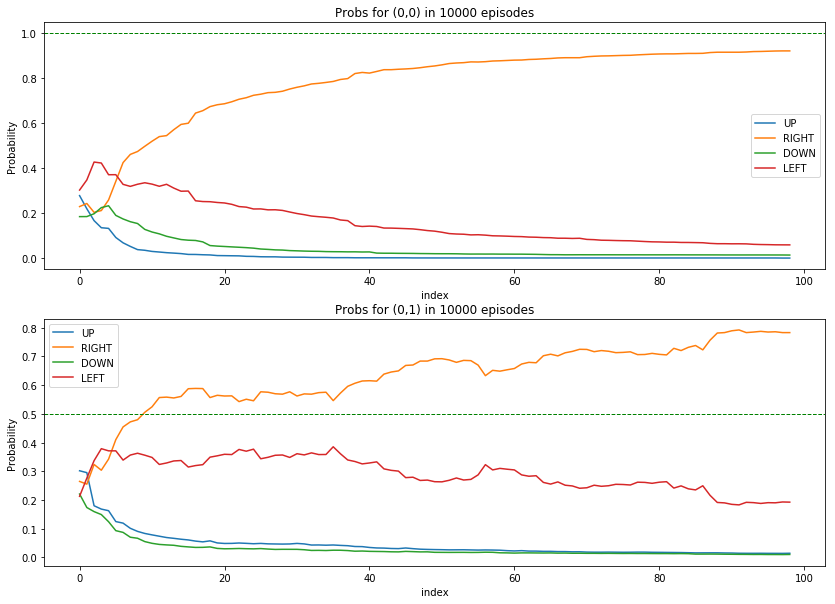


Average: 		0.643
Best 100 Average: 	0.741
Last 100 Average: 	0.708

Agent: ReinforceWithBaselineMemoryAgent 	Alpha_w: 0.01	Alpha_theta: 0.1
x: 0, y:1, probs: [0.00,0.92,0.02,0.06]
x: 1, y:1, probs: [0.01,0.78,0.01,0.19]
x: 2, y:1, probs: [0.95,0.01,0.03,0.01]
x: 3, y:1, probs: [0.01,0.78,0.01,0.19]
x: 4, y:1, probs: [0.00,0.05,0.01,0.94]


In [12]:
plt.figure(1, figsize=(14,10))
plt.plot(avgs)
plt.title(f'Average Return in {episode_count} episodes')
plt.xlabel(f'index')
plt.ylabel(f'Average Return per {plot_count} episodes')
plt.axhline(y=best_performance, linewidth=1, color="g", linestyle='--')
# plt.savefig(f'{figs_folder}agent_{agent_name}_{params_str}.png')
plt.show()

plt.figure(2, figsize=(14,10))
plt.subplot(211)
plt.plot(probs1)
plt.title(f'Probs for (0,0) in {episode_count} episodes')
plt.xlabel(f'index')
plt.ylabel(f'Probability')
plt.legend(['UP', 'RIGHT', 'DOWN', 'LEFT'])
plt.axhline(y=1, linewidth=1, color="g", linestyle='--')

plt.subplot(212)
plt.plot(probs2)
plt.title(f'Probs for (0,1) in {episode_count} episodes')
plt.xlabel(f'index')
plt.ylabel(f'Probability')
plt.legend(['UP', 'RIGHT', 'DOWN', 'LEFT'])
plt.axhline(y=.5, linewidth=1, color="g", linestyle='--')
plt.show()

print('')

results = f'Average: \t\t{np.mean(avgs):5.3f}'
results += f'\nBest {plot_count} Average: \t{np.max(avgs):5.3f}'
results += f'\nLast {plot_count} Average: \t{avgs[-1]:5.3f}'

# print(agent.theta)
# print(agent.v_hat)
results += f'\n\nAgent: {agent_name} \tAlpha_w: {alpha_w}\tAlpha_theta: {alpha_theta}'

test_xs = [0, 1, 2, 3, 4]
test_ys = [1, 1, 1, 1, 1]
for i in range(len(test_xs)):
    env.x = test_xs[i]
    env.y = test_ys[i]
    obs = env.get_obs()
    probs = agent.get_action_vals_for_obs(obs)
    results += f'\nx: {env.x}, y:{env.y}, probs: [{probs[0]:4.2f},{probs[1]:4.2f},{probs[2]:4.2f},{probs[3]:4.2f}]'

print(results)
# Write to file if needed
# file = open(f'{results_folder}agent_{agent_name}_{params_str}.txt', 'w')
# file.write(results)
# file.close()

## REINFORCE with baseline with memory with other rewards

In [17]:
AgentClass = ReinforceWithBaselineMemoryAgent

best_performance = -1.26
env = SmartVac(terminal_rewards=(-1,-3))
num_of_tests = 1
episode_count = 10000
plot_count = int(episode_count / 100)

alpha_theta = 0.1
alpha_w = 0.01
params_str = f'alpha_theta_{alpha_theta}_alpha_w_{alpha_w}_episodes_{episode_count}'

agent_name = AgentClass.__name__

mult_avgs = []
mult_probs1 = []
mult_probs2 = []
for i_test in range(num_of_tests):
    print()
    print(i_test + 1, end=' ')
    
    # Initialize the agent
    agent = AgentClass(alpha_w=alpha_w, alpha_theta=alpha_theta)
    
    avgs = []
    probs1 = []
    probs2 = []
        
    episode_rewards = np.zeros(episode_count)
    for i_episode in range(episode_count):
        done = False
        totalReward = 0

        if i_episode >= plot_count and (i_episode % plot_count == 0):
            avg = np.average(episode_rewards[i_episode - plot_count:i_episode])
            avgs.append(avg)

            # deterministic position
            env.x = 0
            env.y = 1
            obs = env.get_obs()
            prob = agent.get_action_vals_for_obs(obs)
            probs1.append(prob)

            # stochastic position
            env.x = 1
            env.y = 1
            obs = env.get_obs()
            prob = agent.get_action_vals_for_obs(obs)
            probs2.append(prob)

            print('#', end='', flush=True)
            if len(avgs) % 100 == 0:
                print(i_episode)

        obs = env.reset()
        action = agent.start(obs)

        step = 0
        while not done:
            obs, reward, done = env.step(action)
            action = agent.step(obs, reward, done)
            totalReward += reward

            step += 1
            if step > max_episode_steps:
                done = True

        episode_rewards[i_episode] = totalReward
        agent.update_for_episode()
        
    mult_avgs.append(avgs)
    mult_probs1.append(probs1)
    mult_probs2.append(probs2)
    
avgs = np.mean(np.array(mult_avgs), axis=0)
probs1 = np.mean(np.array(mult_probs1), axis=0)
probs2 = np.mean(np.array(mult_probs2), axis=0)


1 ###################################################################################################

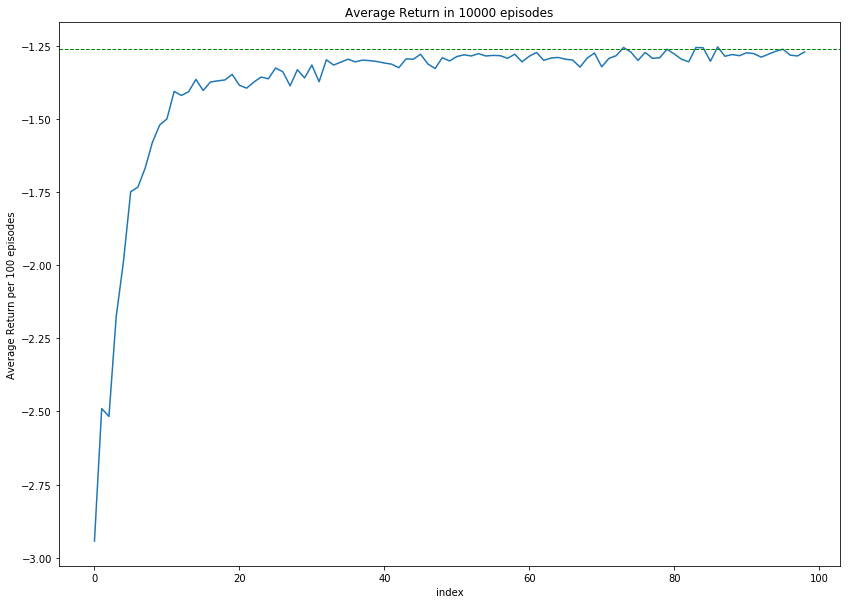

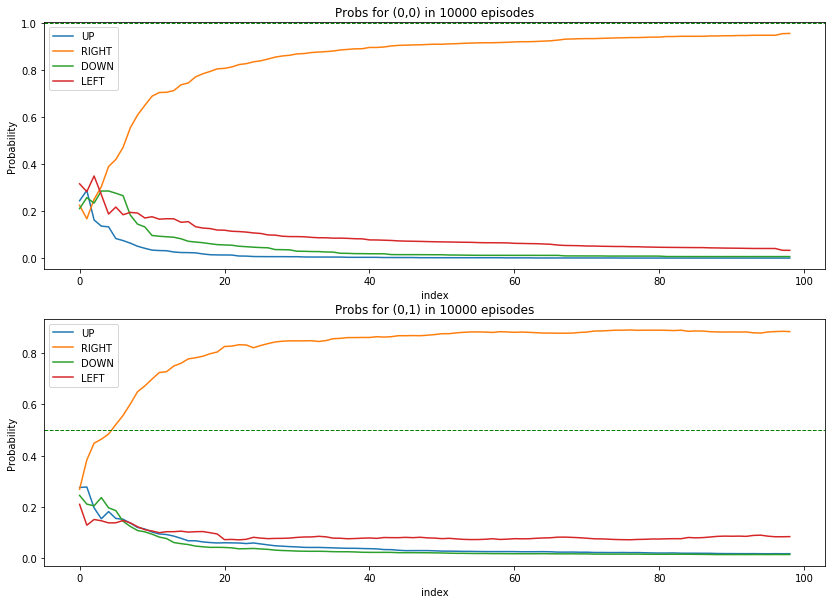


Average: 		-1.384
Best 100 Average: 	-1.254
Last 100 Average: 	-1.271

Agent: ReinforceWithBaselineMemoryAgent 	Alpha: 0.125
x: 0, y:1, probs: [0.00,0.96,0.01,0.03]
x: 1, y:1, probs: [0.02,0.88,0.01,0.09]
x: 2, y:1, probs: [0.94,0.01,0.04,0.01]
x: 3, y:1, probs: [0.02,0.88,0.01,0.09]
x: 4, y:1, probs: [0.00,0.05,0.02,0.93]


In [18]:
plt.figure(1, figsize=(14,10))
plt.plot(avgs)
plt.title(f'Average Return in {episode_count} episodes')
plt.xlabel(f'index')
plt.ylabel(f'Average Return per {plot_count} episodes')
plt.axhline(y=best_performance, linewidth=1, color="g", linestyle='--')
# plt.savefig(f'{figs_folder}agent_{agent_name}_{params_str}.png')
plt.show()

plt.figure(2, figsize=(14,10))
plt.subplot(211)
plt.plot(probs1)
plt.title(f'Probs for (0,0) in {episode_count} episodes')
plt.xlabel(f'index')
plt.ylabel(f'Probability')
plt.legend(['UP', 'RIGHT', 'DOWN', 'LEFT'])
plt.axhline(y=1, linewidth=1, color="g", linestyle='--')

plt.subplot(212)
plt.plot(probs2)
plt.title(f'Probs for (0,1) in {episode_count} episodes')
plt.xlabel(f'index')
plt.ylabel(f'Probability')
plt.legend(['UP', 'RIGHT', 'DOWN', 'LEFT'])
plt.axhline(y=.5, linewidth=1, color="g", linestyle='--')
plt.show()

print('')

results = f'Average: \t\t{np.mean(avgs):5.3f}'
results += f'\nBest {plot_count} Average: \t{np.max(avgs):5.3f}'
results += f'\nLast {plot_count} Average: \t{avgs[-1]:5.3f}'

# print(agent.theta)
results += f'\n\nAgent: {agent_name} \tAlpha: {alpha}'

test_xs = [0, 1, 2, 3, 4]
test_ys = [1, 1, 1, 1, 1]
for i in range(len(test_xs)):
    env.x = test_xs[i]
    env.y = test_ys[i]
    obs = env.get_obs()
    probs = agent.get_action_vals_for_obs(obs)
    results += f'\nx: {env.x}, y:{env.y}, probs: [{probs[0]:4.2f},{probs[1]:4.2f},{probs[2]:4.2f},{probs[3]:4.2f}]'

print(results)
# Write to file if needed
# file = open(f'{results_folder}agent_{agent_name}_{params_str}.txt', 'w')
# file.write(results)
# file.close()